<a href="https://colab.research.google.com/github/ArunHR26/banking-fraud-detection-mlops/blob/master/banking_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Cell 1: Setup and Data Download (Using Colab Secrets)

# Step 1.1: Install the Kaggle API client
# This allows you to interact with Kaggle directly from Colab.
!pip install kaggle

# Step 1.2: Import necessary library to access Colab secrets
from google.colab import userdata
import os

# Step 1.3: Load Kaggle credentials from Colab Secrets into environment variables
# Colab's `userdata.get()` allows secure access to secrets you've stored.
# The Kaggle API client looks for these specific environment variables.
try:
    os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
    os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
    print("Kaggle credentials loaded from Colab Secrets.")
except Exception as e:
    print(f"Error loading Kaggle credentials from Secrets: {e}")
    print("Please ensure you have 'KAGGLE_USERNAME' and 'KAGGLE_KEY' set in Colab Secrets (the key icon on the left sidebar) and 'Notebook access' is enabled for them.")
    # Exit or raise an error if credentials aren't set, as subsequent steps will fail
    raise SystemExit("Kaggle credentials not properly configured in Colab Secrets.")


# Step 1.4: (Optional but good practice) Create a .kaggle directory
# The Kaggle API client expects configuration in ~/.kaggle.
# While not strictly necessary if using environment variables, it's good for consistency.
!mkdir -p ~/.kaggle

# Step 1.5: Download the dataset
# We'll use the 'Credit Card Fraud Detection' dataset.
# You can find it at: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
print("Downloading the Credit Card Fraud Detection dataset...")
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Step 1.6: Unzip the downloaded dataset
# Kaggle datasets are often downloaded as zip files.
print("Unzipping the dataset...")
!unzip creditcardfraud.zip -d . # Unzip into the current directory

print("\nSetup complete! You should now have 'creditcard.csv' in your Colab environment.")
print("You can verify this by checking the 'Files' tab on the left sidebar in Colab.")

Kaggle credentials loaded from Colab Secrets.
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.02GB/s]
Unzipping the dataset...
Archive:  creditcardfraud.zip
  inflating: ./creditcard.csv        

Setup complete! You should now have 'creditcard.csv' in your Colab environment.
You can verify this by checking the 'Files' tab on the left sidebar in Colab.


In [36]:
# Cell 2: Load and Initial Data Exploration

# Step 2.1: Import the pandas library
# Pandas is essential for data manipulation and analysis in Python.
import pandas as pd

# Step 2.2: Load the creditcard.csv file into a pandas DataFrame
# The dataset is now in the current working directory from the previous step.
print("Loading 'creditcard.csv' into a DataFrame...")
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please ensure the previous step ran correctly.")
    # Exit if the file isn't found, as subsequent steps will fail
    raise SystemExit("Dataset file is missing.")

# Step 2.3: Display the first 5 rows of the DataFrame
# This gives a quick peek at the data's structure and content.
print("\nStep 2.3: First 5 rows of the DataFrame:")
print(df.head())

# Step 2.4: Get a concise summary of the DataFrame
# This shows the number of non-null entries and the data type for each column.
print("\nStep 2.4: DataFrame Info (Summary of columns and data types):")
df.info()

# Step 2.5: Check for any missing values in the DataFrame
# This is crucial for data cleaning. `isnull().sum()` counts missing values per column.
print("\nStep 2.5: Missing values per column:")
print(df.isnull().sum())

print("\nInitial data exploration complete.")

Loading 'creditcard.csv' into a DataFrame...
Dataset loaded successfully.

Step 2.3: First 5 rows of the DataFrame:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376 

Step 3.2: Distribution of the 'Class' variable:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraudulent transactions:
0.1727485630620034


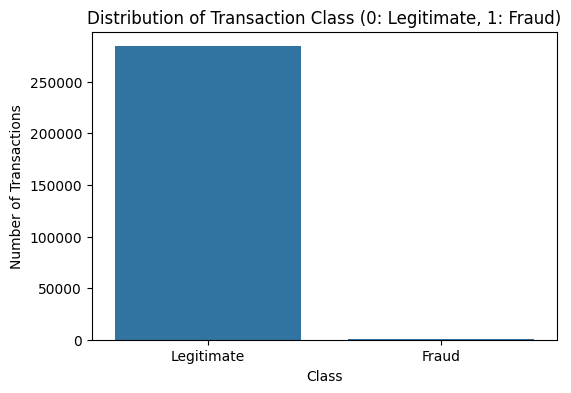

As you can see from the plot and counts, the dataset is highly imbalanced.

Step 3.4: Descriptive statistics for numerical features:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.84

In [37]:
# Cell 3: Target Variable Analysis and Descriptive Statistics

# Step 3.1: Import necessary visualization library
# Seaborn is built on Matplotlib and provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3.2: Check the distribution of the 'Class' variable
# The 'Class' column is our target variable: 0 for legitimate, 1 for fraudulent.
print("Step 3.2: Distribution of the 'Class' variable:")
print(df['Class'].value_counts())
print("\nPercentage of fraudulent transactions:")
print((df['Class'].value_counts()[1] / len(df)) * 100)

# Step 3.3: Visualize the distribution of the 'Class' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Transaction Class (0: Legitimate, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraud'])
plt.show()
print("As you can see from the plot and counts, the dataset is highly imbalanced.")

# Step 3.4: Get descriptive statistics for numerical features
# This provides insights into the central tendency, dispersion, and shape of the distribution of each column.
print("\nStep 3.4: Descriptive statistics for numerical features:")
print(df.describe())

print("\nTarget variable analysis and descriptive statistics complete.")

Step 4.1: Separating features (X) and target (y)...
Original X shape: (284807, 30)
Original y shape: (284807,)

Step 4.2: Installing 'imbalanced-learn' library...

Step 4.3: Applying SMOTE to balance the dataset...
SMOTE applied successfully.
Resampled X shape: (568630, 30)
Resampled y shape: (568630,)

Step 4.4: New distribution of the 'Class' variable after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


/tmp/ipython-input-38-1539029041.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


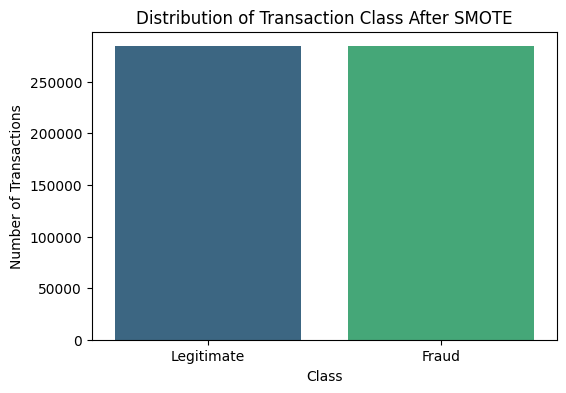


Data imbalance handling complete using SMOTE.
The dataset is now balanced, with an equal number of legitimate and fraudulent transactions.


In [38]:
# Cell 4: Handle Data Imbalance using SMOTE

# Step 4.1: Separate features (X) and target (y)
# 'Class' is our target variable, and all other columns are features.
print("Step 4.1: Separating features (X) and target (y)...")
X = df.drop('Class', axis=1) # Features
y = df['Class']             # Target variable
print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

# Step 4.2: Install the imbalanced-learn library
# This library provides various techniques for handling imbalanced datasets.
print("\nStep 4.2: Installing 'imbalanced-learn' library...")
!pip install imbalanced-learn

# Step 4.3: Apply SMOTE to balance the dataset
# SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class.
print("\nStep 4.3: Applying SMOTE to balance the dataset...")
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # Using a fixed random_state for reproducibility
X_resampled, y_resampled = sm.fit_resample(X, y)

print("SMOTE applied successfully.")
print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y shape: {y_resampled.shape}")

# Step 4.4: Verify the new class distribution
# Check the class distribution after applying SMOTE.
print("\nStep 4.4: New distribution of the 'Class' variable after SMOTE:")
print(y_resampled.value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Distribution of Transaction Class After SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraud'])
plt.show()

print("\nData imbalance handling complete using SMOTE.")
print("The dataset is now balanced, with an equal number of legitimate and fraudulent transactions.")

In [39]:
# Cell 5: Feature Scaling and Data Splitting

# Step 5.1: Import necessary preprocessing and model selection libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 5.2: Initialize the StandardScaler
# StandardScaler transforms data to have a mean of 0 and a standard deviation of 1.
# We exclude 'Time' and 'Amount' if we decide to treat them differently,
# but for this dataset, standardizing all 'V' features plus 'Time' and 'Amount' is common.
print("Step 5.2: Scaling numerical features using StandardScaler...")

# Identify columns to scale. 'Class' is not in X_resampled, 'Time' and 'Amount' are features.
# All V-features are already scaled from the original dataset's PCA transformation,
# but 'Time' and 'Amount' are not. We will scale all features in X_resampled for consistency.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled array back to a DataFrame with original column names for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)
print("Features scaled successfully.")

# Step 5.3: Split the scaled data into training and testing sets
# We'll use a 70/30 split (70% for training, 30% for testing).
# stratify=y_resampled ensures that both the training and testing sets have a similar proportion
# of fraudulent and legitimate transactions, which is critical for imbalanced (now balanced) datasets.
print("\nStep 5.3: Splitting data into training and testing sets (70/30 split)...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Verify the class distribution in training and test sets
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

print("\nFeature scaling and data splitting complete.")
print("The data is now ready for model training!")# Cell 5: Feature Scaling and Data Splitting

# Step 5.1: Import necessary preprocessing and model selection libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 5.2: Initialize the StandardScaler
# StandardScaler transforms data to have a mean of 0 and a standard deviation of 1.
# We exclude 'Time' and 'Amount' if we decide to treat them differently,
# but for this dataset, standardizing all 'V' features plus 'Time' and 'Amount' is common.
print("Step 5.2: Scaling numerical features using StandardScaler...")

# Identify columns to scale. 'Class' is not in X_resampled, 'Time' and 'Amount' are features.
# All V-features are already scaled from the original dataset's PCA transformation,
# but 'Time' and 'Amount' are not. We will scale all features in X_resampled for consistency.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled array back to a DataFrame with original column names for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)
print("Features scaled successfully.")

# Step 5.3: Split the scaled data into training and testing sets
# We'll use a 70/30 split (70% for training, 30% for testing).
# stratify=y_resampled ensures that both the training and testing sets have a similar proportion
# of fraudulent and legitimate transactions, which is critical for imbalanced (now balanced) datasets.
print("\nStep 5.3: Splitting data into training and testing sets (70/30 split)...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Verify the class distribution in training and test sets
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

print("\nFeature scaling and data splitting complete.")
print("The data is now ready for model training!")

Step 5.2: Scaling numerical features using StandardScaler...
Features scaled successfully.

Step 5.3: Splitting data into training and testing sets (70/30 split)...
X_train shape: (398041, 30)
X_test shape: (170589, 30)
y_train shape: (398041,)
y_test shape: (170589,)

Class distribution in y_train:
Class
1    0.500001
0    0.499999
Name: proportion, dtype: float64

Class distribution in y_test:
Class
0    0.500003
1    0.499997
Name: proportion, dtype: float64

Feature scaling and data splitting complete.
The data is now ready for model training!
Step 5.2: Scaling numerical features using StandardScaler...
Features scaled successfully.

Step 5.3: Splitting data into training and testing sets (70/30 split)...
X_train shape: (398041, 30)
X_test shape: (170589, 30)
y_train shape: (398041,)
y_test shape: (170589,)

Class distribution in y_train:
Class
1    0.500001
0    0.499999
Name: proportion, dtype: float64

Class distribution in y_test:
Class
0    0.500003
1    0.499997
Name: proport

In [41]:
# Cell 8: Model Persistence

# Step 8.1: Import the joblib library
# joblib is efficient for saving and loading Python objects that internally store large NumPy arrays.
import joblib
import os # To manage file paths

# Define a filename for your model
model_filename = 'xgb_fraud_detector_model.joblib'

# Step 8.2: Save the trained XGBoost model
print(f"Step 8.2: Saving the XGBoost model to {model_filename}...")
try:
    joblib.dump(xgb_model, model_filename)
    print(f"Model successfully saved to '{model_filename}'")
except Exception as e:
    print(f"Error saving model: {e}")

# Step 8.3: (Optional) Load the model to verify
# This simulates how a deployment environment would load your model.
print(f"\nStep 8.3: (Optional) Loading the model from {model_filename} to verify...")
try:
    loaded_model = joblib.load(model_filename)
    print("Model loaded successfully.")

    # Verify by making a prediction with the loaded model on a small sample
    # We'll take the first 5 samples from X_test for verification
    sample_predictions = loaded_model.predict(X_test.head(5))
    print("\nPredictions from loaded model on first 5 test samples:")
    print(f"Predicted: {sample_predictions}")
    print(f"Actual:    {y_test.head(5).values}")

    # Check if a basic prediction works
    if len(sample_predictions) > 0:
        print("Loaded model can make predictions, verification successful.")
    else:
        print("Loaded model verification failed: No predictions made.")

except FileNotFoundError:
    print(f"Error: Model file '{model_filename}' not found. Check save path.")
except Exception as e:
    print(f"Error loading or verifying model: {e}")

print("\nModel persistence step complete.")
print(f"The model '{model_filename}' is now ready to be versioned and potentially deployed.")

Step 8.2: Saving the XGBoost model to xgb_fraud_detector_model.joblib...
Model successfully saved to 'xgb_fraud_detector_model.joblib'

Step 8.3: (Optional) Loading the model from xgb_fraud_detector_model.joblib to verify...
Model loaded successfully.

Predictions from loaded model on first 5 test samples:
Predicted: [1 0 0 0 0]
Actual:    [1 0 0 0 0]
Loaded model can make predictions, verification successful.

Model persistence step complete.
The model 'xgb_fraud_detector_model.joblib' is now ready to be versioned and potentially deployed.


Step 9.1: Installing SHAP library...
SHAP installed.

Step 9.3: Creating SHAP explainer and calculating SHAP values...
SHAP values calculated.

Step 9.4: Displaying SHAP Summary Plot (Global Feature Importance)...


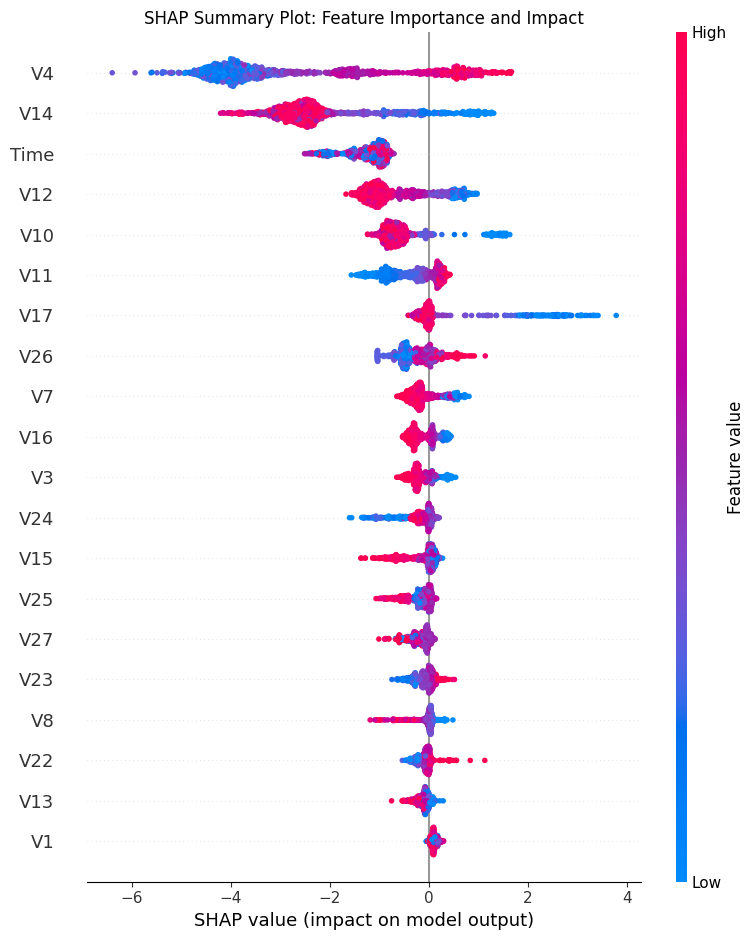


Step 9.4 (cont.): Displaying SHAP Bar Plot (Mean Absolute SHAP Value)...


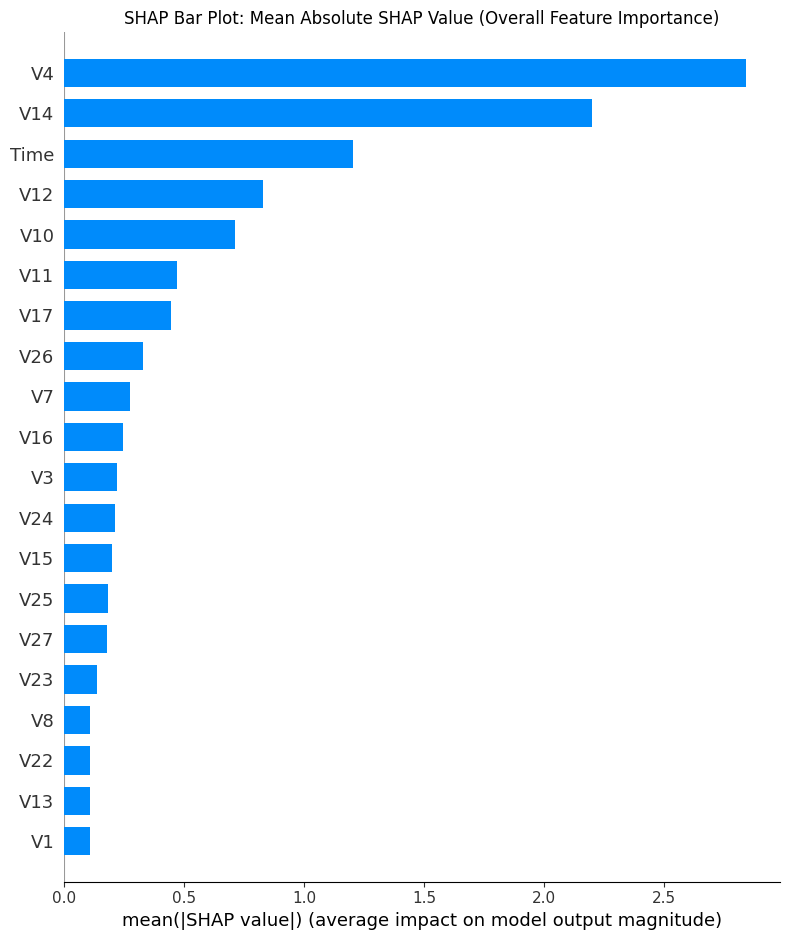

Note: The first actual fraud from X_test was not in the SHAP subset. Explaining a random fraud from the subset instead.

Step 9.5: Explaining an individual fraudulent prediction (Original Index: 420328)...
SHAP Force plot generated. This plot shows how each feature contributes to pushing the output from the base value to the model's output.
The model predicted this transaction as: 0
The actual label for this transaction was: 1

Model interpretability with SHAP complete.
This output demonstrates a key capability for ML Engineering roles in regulated industries.


In [42]:
# Cell 9: Model Interpretability with SHAP

# Step 9.1: Install the SHAP library
print("Step 9.1: Installing SHAP library...")
!pip install shap
print("SHAP installed.")

# Step 9.2: Import SHAP and set up Matplotlib for plots
import shap
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings that might come from SHAP if not critical
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='shap')
warnings.filterwarnings('ignore', category=FutureWarning)

# Step 9.3: Create a SHAP explainer for the XGBoost model
# For tree-based models like XGBoost, shap.TreeExplainer is efficient and exact.
print("\nStep 9.3: Creating SHAP explainer and calculating SHAP values...")
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for a subset of the test data (e.g., 1000 samples)
# Calculating for the entire test set can be computationally intensive for large datasets.
# For demonstration, let's use a sample or the first N rows of X_test.
# Ensure X_test is a pandas DataFrame when passing to SHAP if you want column names in plots.
X_test_subset = X_test.sample(n=min(1000, len(X_test)), random_state=42) # Sample up to 1000 rows
shap_values = explainer.shap_values(X_test_subset)
print("SHAP values calculated.")

# Step 9.4: Visualize global feature importance (Summary Plot)
# This plot shows the impact of each feature on the model output.
# Each dot is an observation, its position on the x-axis shows the SHAP value,
# and its color shows the feature's actual value (red for high, blue for low).
print("\nStep 9.4: Displaying SHAP Summary Plot (Global Feature Importance)...")
plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
shap.summary_plot(shap_values, X_test_subset, plot_type="dot", show=False)
plt.title('SHAP Summary Plot: Feature Importance and Impact')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# If you prefer a bar plot for overall feature importance (mean absolute SHAP value)
print("\nStep 9.4 (cont.): Displaying SHAP Bar Plot (Mean Absolute SHAP Value)...")
plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values, X_test_subset, plot_type="bar", show=False)
plt.title('SHAP Bar Plot: Mean Absolute SHAP Value (Overall Feature Importance)')
plt.tight_layout()
plt.show()


# Step 9.5: Explain an individual prediction (Force Plot)
# This is crucial for explaining specific fraud alerts.
# Let's find an actual fraudulent transaction from the test set to explain.
fraud_indices_in_test = y_test[y_test == 1].index
if len(fraud_indices_in_test) > 0:
    # Get the index of a fraudulent transaction from the original X_test
    # This ensures we pick a row that was actually in X_test, not X_test_subset
    first_fraud_original_idx = fraud_indices_in_test[0]
    # Find its corresponding index in the X_test DataFrame after sampling (if sampled)
    if first_fraud_original_idx in X_test_subset.index:
        # If it's in the subset, get its location in the subset
        fraud_sample_idx = X_test_subset.index.get_loc(first_fraud_original_idx)
    else:
        # If not in the subset, find a fraud from the subset directly
        # This will be less precise, but ensures we explain a fraud from the sampled data
        print("Note: The first actual fraud from X_test was not in the SHAP subset. Explaining a random fraud from the subset instead.")
        fraud_sample_idx = np.where(y_test.loc[X_test_subset.index] == 1)[0][0] # find first fraud in sampled y
        first_fraud_original_idx = X_test_subset.index[fraud_sample_idx] # get its original index

    print(f"\nStep 9.5: Explaining an individual fraudulent prediction (Original Index: {first_fraud_original_idx})...")
    # For a specific instance, get its SHAP values
    single_instance_shap_values = explainer.shap_values(X_test.loc[[first_fraud_original_idx]])[0] # [0] for positive class if binary
    single_instance_data = X_test.loc[[first_fraud_original_idx]]

    # Ensure the correct type for force_plot
    # shap.initjs() # This is needed if you want interactive plots in a web environment. Not always necessary in Colab.
    shap.force_plot(explainer.expected_value, single_instance_shap_values, single_instance_data)
    # Note: force_plot might open in a new browser tab or render interactively if shap.initjs() is called.
    # In some Colab environments, it might render directly below.
    print("SHAP Force plot generated. This plot shows how each feature contributes to pushing the output from the base value to the model's output.")
    print(f"The model predicted this transaction as: {xgb_model.predict(single_instance_data)[0]}")
    print(f"The actual label for this transaction was: {y_test.loc[first_fraud_original_idx]}")
else:
    print("\nNo fraudulent transactions found in the test set to demonstrate individual explanation.")
    print("This is highly unlikely after SMOTE and stratified splitting, but check your data if this message persists.")


print("\nModel interpretability with SHAP complete.")
print("This output demonstrates a key capability for ML Engineering roles in regulated industries.")